In [7]:
import os

In [8]:
import shutil

In [10]:
from tqdm import tqdm

In [8]:
Raw_DIR= r'D:\project\dataset\mrlEyes_2018_01'
for dirpath, dirname, filenames in os.walk(Raw_DIR):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        if i.split('_')[4]=='0':
            shutil.copy(src=dirpath+'/'+i, dst=r'D:\project\dataset\Prepared_Data\Closed Eyes 1')
        
        elif i.split('_')[4]=='1':
            shutil.copy(src=dirpath+'/'+i, dst=r'D:\project\dataset\Prepared_Data\Open Eyes 1')

0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████| 10257/10257 [01:46<00:00, 96.35it/s]


100%|███████████████████████████████████████████████████████████████████████████| 42952/42952 [05:21<00:00, 133.49it/s]


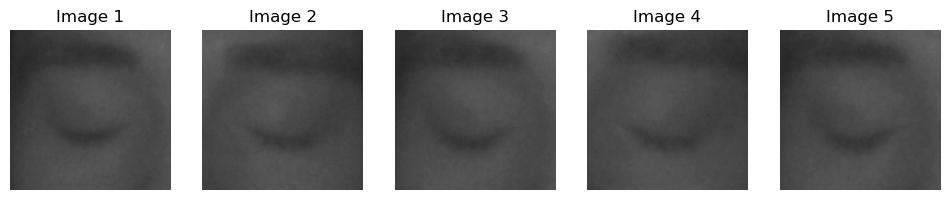

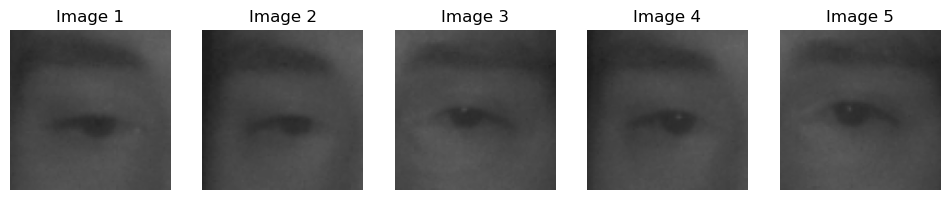

In [11]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

def is_blurry(image, threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold

def reduce_blur(image, kernel_size=(5, 5)):
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

def display_images(images_folder, num_images=5):
    image_paths = [os.path.join(images_folder, filename) for filename in os.listdir(images_folder)[:num_images]]

    plt.figure(figsize=(12, 6))
    for i, image_path in enumerate(image_paths, 1):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, num_images, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Image {i}')

    plt.show()

def remove_and_reduce_blur(input_folder, output_folder, blur_threshold=100):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in tqdm(os.listdir(input_folder)):
        image_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        try:
            image = cv2.imread(image_path)
            if image is None:
                print(f"Skipping invalid image: {filename}")
                continue

            if is_blurry(image, blur_threshold):
                blurred_image = reduce_blur(image)
                cv2.imwrite(output_path, blurred_image)
            else:
                cv2.imwrite(output_path, image)
        except Exception as e:
            print(f"Error processing image {filename}: {str(e)}")


input_folder = r'D:\project\dataset\Prepared_Data\Closed Eyes 1'
output_folder = r'D:\project\dataset\non_blurry_data\Closed Eyes 1'
remove_and_reduce_blur(input_folder, output_folder)

input_folder = r'D:\project\dataset\Prepared_Data\Open Eyes 1'
output_folder = r'D:\project\dataset\non_blurry_data\Open Eyes 1'
remove_and_reduce_blur(input_folder, output_folder)

folder1 = r'D:\project\dataset\non_blurry_data\Closed Eyes 1'
folder2 = r'D:\project\dataset\non_blurry_data\Open Eyes 1'
display_images(folder1, num_images=5)
display_images(folder2, num_images=5)


100%|███████████████████████████████████████████████████████████████████████████| 42952/42952 [04:44<00:00, 150.92it/s]


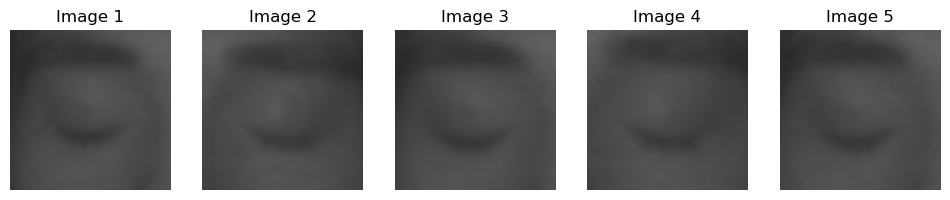

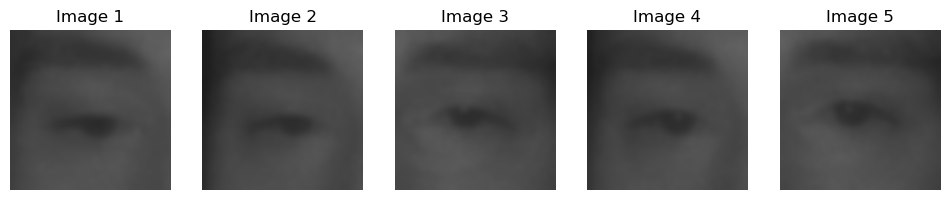

In [12]:
#noise removal
import cv2
import os
from tqdm import tqdm

def display_images(images_folder, num_images=5):
    image_paths = [os.path.join(images_folder, filename) for filename in os.listdir(images_folder)[:num_images]]

    plt.figure(figsize=(12, 6))
    for i, image_path in enumerate(image_paths, 1):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, num_images, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Image {i}')

    plt.show()
    
def nr(inp,oup):
    # Specify the input and output folders
    input_folder =inp
    output_folder =oup

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Function to apply noise reduction to an image
    def apply_noise_reduction(image_path, output_path, kernel_size=3):
        # Read the image
        img = cv2.imread(image_path)

        # Check if the image is successfully loaded
        if img is None:
            print(f"Error: Unable to read image - {image_path}")
        else:
            # Apply Gaussian smoothing for noise reduction
            img_noise_reduced = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

            # Save the noise-reduced image
            cv2.imwrite(output_path, img_noise_reduced)

    # Apply noise reduction to each image in the input folder
    for filename in tqdm(os.listdir(input_folder)):
        img_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        apply_noise_reduction(img_path, output_path)
        
ip1=r'D:\project\dataset\non_blurry_data\Closed Eyes 1'
op1=r'D:\project\dataset\noise_reduced_data\Closed Eyes 1'
nr(ip1,op1)

ip2=r'D:\project\dataset\non_blurry_data\Open Eyes 1'
op2=r'D:\project\dataset\noise_reduced_data\Open Eyes 1'
nr(ip2,op2)

folder1 = r'D:\project\dataset\noise_reduced_data\Closed Eyes 1'
folder2 = r'D:\project\dataset\noise_reduced_data\Open Eyes 1'
display_images(folder1, num_images=5)
display_images(folder2, num_images=5)

In [13]:
batchsize=8
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'D:\project\dataset\noise_reduced_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'D:\project\dataset\noise_reduced_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\project\dataset\noise_reduced_data',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.
Found 84898 images belonging to 2 classes.


In [14]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 80, 80, 3)]          0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 39, 39, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 39, 39, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 39, 39, 32)           0         ['batch_normalization_94

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint(r'D:\project\driver_drowsiness\models\model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,validation_steps=validation_data.samples//batchsize,callbacks=callbacks,epochs=5)

Epoch 1/5


C:\Users\Sai Rohit\AppData\Local\Temp\ipykernel_20840\2097444248.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


8489/8489 [==============================] - ETA: 0s - loss: 0.2210 - accuracy: 0.9120
Epoch 1: val_loss improved from inf to 0.24113, saving model to D:\project\driver_drowsiness\models\model.h5


C:\Users\Sai Rohit\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8489/8489 [==============================] - 1034s 121ms/step - loss: 0.2210 - accuracy: 0.9120 - val_loss: 0.2411 - val_accuracy: 0.8912 - lr: 0.0010
Epoch 2/5
8489/8489 [==============================] - ETA: 0s - loss: 0.1880 - accuracy: 0.9260
Epoch 2: val_loss improved from 0.24113 to 0.23503, saving model to D:\project\driver_drowsiness\models\model.h5
8489/8489 [==============================] - 1061s 125ms/step - loss: 0.1880 - accuracy: 0.9260 - val_loss: 0.2350 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 3/5
8489/8489 [==============================] - ETA: 0s - loss: 0.1777 - accuracy: 0.9296
Epoch 3: val_loss improved from 0.23503 to 0.22953, saving model to D:\project\driver_drowsiness\models\model.h5
8489/8489 [==============================] - 987s 116ms/step - loss: 0.1777 - accuracy: 0.9296 - val_loss: 0.2295 - val_accuracy: 0.9090 - lr: 0.0010
Epoch 4/5
8489/8489 [==============================] - ETA: 0s - loss: 0.1754 - accuracy: 0.9309
Epoch 4: val_loss did not impro

In [19]:
loss_vr, acc_vr = model.evaluate_generator(validation_data)
print(acc_vr)

C:\Users\Sai Rohit\AppData\Local\Temp\ipykernel_20840\2727073709.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_vr, acc_vr = model.evaluate_generator(validation_data)


0.9054714441299438


In [20]:
print(loss_vr)

0.22799868881702423


In [21]:
loss_test,acc_test = model.evaluate_generator(test_data)
print(acc_test)

C:\Users\Sai Rohit\AppData\Local\Temp\ipykernel_20840\2892122740.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_test,acc_test = model.evaluate_generator(test_data)


0.9504817724227905


In [22]:
print(loss_test)

0.1261063665151596
